<a href="https://colab.research.google.com/github/Anshita-G/AWS-Python/blob/main/fashionAccessoriesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


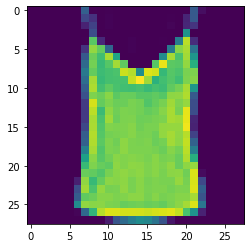

In [17]:
plt.imshow(x_train[232])

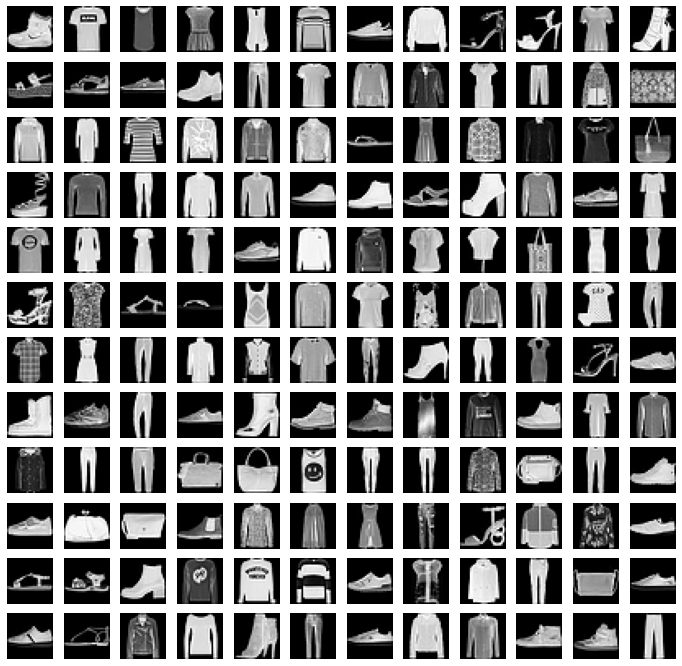

In [25]:
plt.figure(figsize=(12,12))
for i in range(144):
  plt.subplot(12,12,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


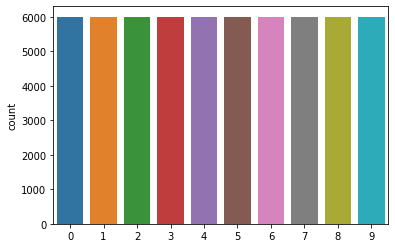

In [19]:
#equal no of sets are required for each sample
sns.countplot(y_train)

In [30]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_test = x_test.reshape([10000, 28, 28, 1])


In [33]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [37]:
#augument the data==flipping image adjusting image etc prepare data model for everything
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
train_datagen.fit(x_train)


In [38]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen.fit(x_test)

In [40]:
#training model
model = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(64, (3,3), padding = 'same' , activation='relu' , input_shape=(28,28,1)),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256, activation= 'relu'),
                            tf.keras.layers.Dense(10, activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [42]:
#cost function (difference between actual label and predicted label)
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss = 'categorical_crossentropy',
              metrics =['accuracy']
              )

In [43]:
history =  model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 64),
    validation_data = val_datagen.flow(x_test , y_test),
    batch_size = 64,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
938/938 [==============================] - 51s 21ms/step - loss: 0.6304 - accuracy: 0.7613 - val_loss: 0.4220 - val_accuracy: 0.8451
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.4265 - accuracy: 0.8393 - val_loss: 0.3717 - val_accuracy: 0.8650
Epoch 3/20
938/938 [==============================] - 17s 19ms/step - loss: 0.3705 - accuracy: 0.8606 - val_loss: 0.3612 - val_accuracy: 0.8671
Epoch 4/20
938/938 [==============================] - 19s 20ms/step - loss: 0.3374 - accuracy: 0.8732 - val_loss: 0.3475 - val_accuracy: 0.8750
Epoch 5/20
938/938 [==============================] - 19s 20ms/step - loss: 0.3151 - accuracy: 0.8817 - val_loss: 0.2892 - val_accuracy: 0.8940
Epoch 6/20
938/938 [==============================] - 19s 21ms/step - loss: 0.2989 - accuracy: 0.8878 - val_loss: 0.2852 - val_accuracy: 0.8959
Epoch 7/20
938/938 [==============================] - 18s 19ms/step - loss: 0.2868 - accuracy: 0.8914 - val_loss: 0.2880 - val_accuracy:

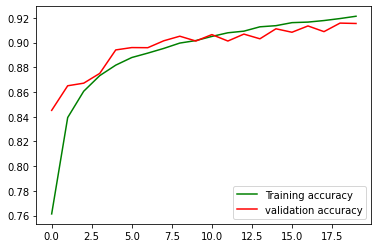

In [46]:
# objective == which class does the accessory belong
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color ='green', label = 'Training accuracy')
plt.plot(val_acc,color ='red', label = 'validation accuracy')
plt.legend()

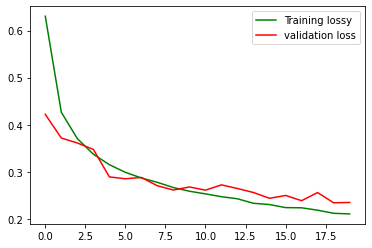

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color ='green', label = 'Training lossy')
plt.plot(val_loss,color ='red', label = 'validation loss')
plt.legend()